# MNIST 데이터로 DL

</br>

#### - 데이터 전처리

- Tensorflow에서 MNSIT 읽기

- 각 픽셀의 최대값이 255인 것을 1로 조정 $~\dashrightarrow~$ 일종의 MinMax Scaler로 모든 값을 0~1 사이의 값으로 조정

- one-hot-encoding

	- 0~9까지의 class에 대한 one-hot-encoding이 필요하다.

	- one-hot-encoding을 할 수 있는 또 하나의 방법이 loss 함수를 sparse_categorical_crossentropy로 설정하는 것이다.
	
	- sparse_categorical_crossentropy를 사용하면 one-hot-encoding과 같은 효과이다.

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255, x_test/255

In [2]:
x_train[0] #--> 28 x 28 pixel image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#### - 모델 만들기

<img src="https://github.com/ElaYJ/supplement/assets/153154981/6e9a08db-5726-45b0-ab7f-1e6bb1900561" width="67%">

In [3]:
model = tf.keras.models.Sequential([
	tf.keras.layers.Flatten(input_shape=(28,28)),
	tf.keras.layers.Dense(1000, activation='relu'),
	tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795010 (3.03 MB)
Trainable params: 795010 (3.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### - 모델 학습

In [5]:
%%time

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=100, verbose=1)

Epoch 1/10
600/600 [==============================] - 8s 12ms/step - loss: 0.2196 - accuracy: 0.9362 - val_loss: 0.1108 - val_accuracy: 0.9666
Epoch 2/10
600/600 [==============================] - 7s 12ms/step - loss: 0.0862 - accuracy: 0.9738 - val_loss: 0.0785 - val_accuracy: 0.9745
Epoch 3/10
600/600 [==============================] - 8s 13ms/step - loss: 0.0534 - accuracy: 0.9840 - val_loss: 0.0652 - val_accuracy: 0.9791
Epoch 4/10
600/600 [==============================] - 7s 12ms/step - loss: 0.0357 - accuracy: 0.9897 - val_loss: 0.0659 - val_accuracy: 0.9786
Epoch 5/10
600/600 [==============================] - 8s 13ms/step - loss: 0.0250 - accuracy: 0.9928 - val_loss: 0.0679 - val_accuracy: 0.9783
Epoch 6/10
600/600 [==============================] - 7s 12ms/step - loss: 0.0188 - accuracy: 0.9946 - val_loss: 0.0696 - val_accuracy: 0.9792
Epoch 7/10
600/600 [==============================] - 8s 14ms/step - loss: 0.0140 - accuracy: 0.9957 - val_loss: 0.0695 - val_accuracy: 0.9788

#### - 결과 확인

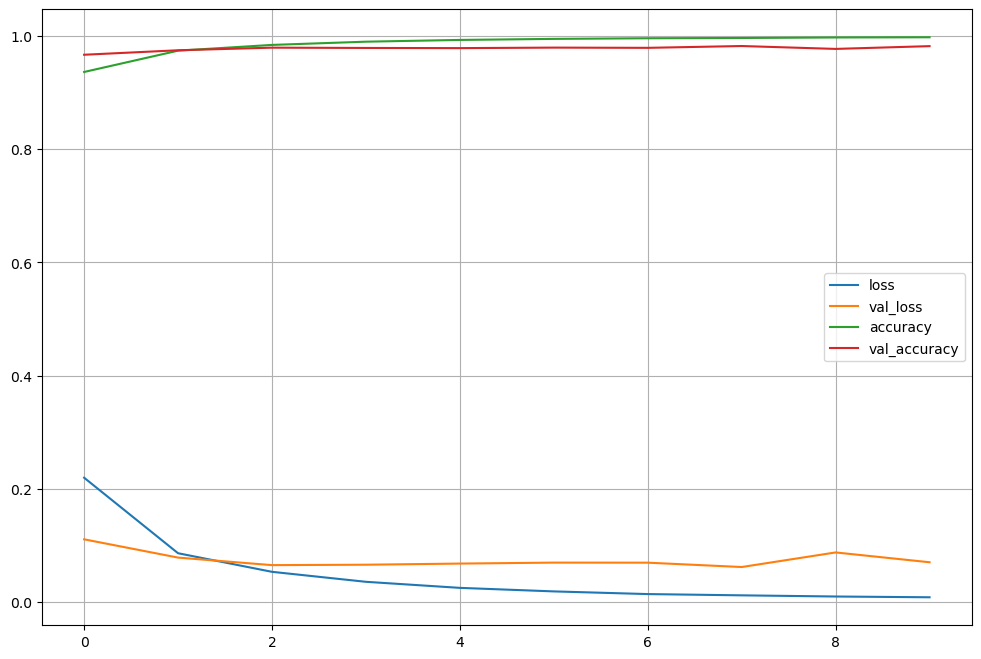

In [6]:
import matplotlib.pyplot as plt

plot_target = ['loss','val_loss','accuracy','val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show() #--> 이상적인 수렴 그래프를 보여주고 있다.

In [7]:
score = model.evaluate(x_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1]) #--> 머신러닝의 93% 결과 대비 5% 정도 향상되었다.

313/313 [==============================] - 1s 3ms/step - loss: 0.0703 - accuracy: 0.9818
Test loss : 0.07025683671236038
Test accuracy : 0.9818000197410583


In [10]:
x_test.shape

(10000, 28, 28)

In [8]:
# predict

predicted_result = model.predict(x_test)
predicted_result.shape

313/313 [==============================] - 1s 3ms/step


(10000, 10)

In [9]:
predicted_result[0] #--> 9.9999416e-01 확률로 7을 예측

array([4.0116632e-11, 8.9213168e-12, 9.8289887e-10, 5.0646672e-06,
       2.2924577e-14, 2.2388923e-10, 1.2727493e-13, 9.9999416e-01,
       2.2159677e-10, 8.8369080e-07], dtype=float32)

In [11]:
# 무엇이 틀렸는지 확인해본다.

import numpy as np


predicted_labels = np.argmax(predicted_result, axis=1) # axis=0 --> 10000, axis=1 --> 10
predicted_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [12]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [13]:
np.argmax(predicted_result[0]) #--> 최대값의 인덱스를 읽어온다. (argument max)

7

In [14]:
# 틀린 데이터의 인덱스만 모은다.

wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

182

In [15]:
# 그 중 16개만 랜덤 샘플링

import random

samples = random.choices(population=wrong_result, k=16)
print(samples)

[6608, 2534, 2293, 3503, 4201, 5757, 5955, 2939, 6559, 1621, 3503, 938, 4176, 3941, 2185, 1299]


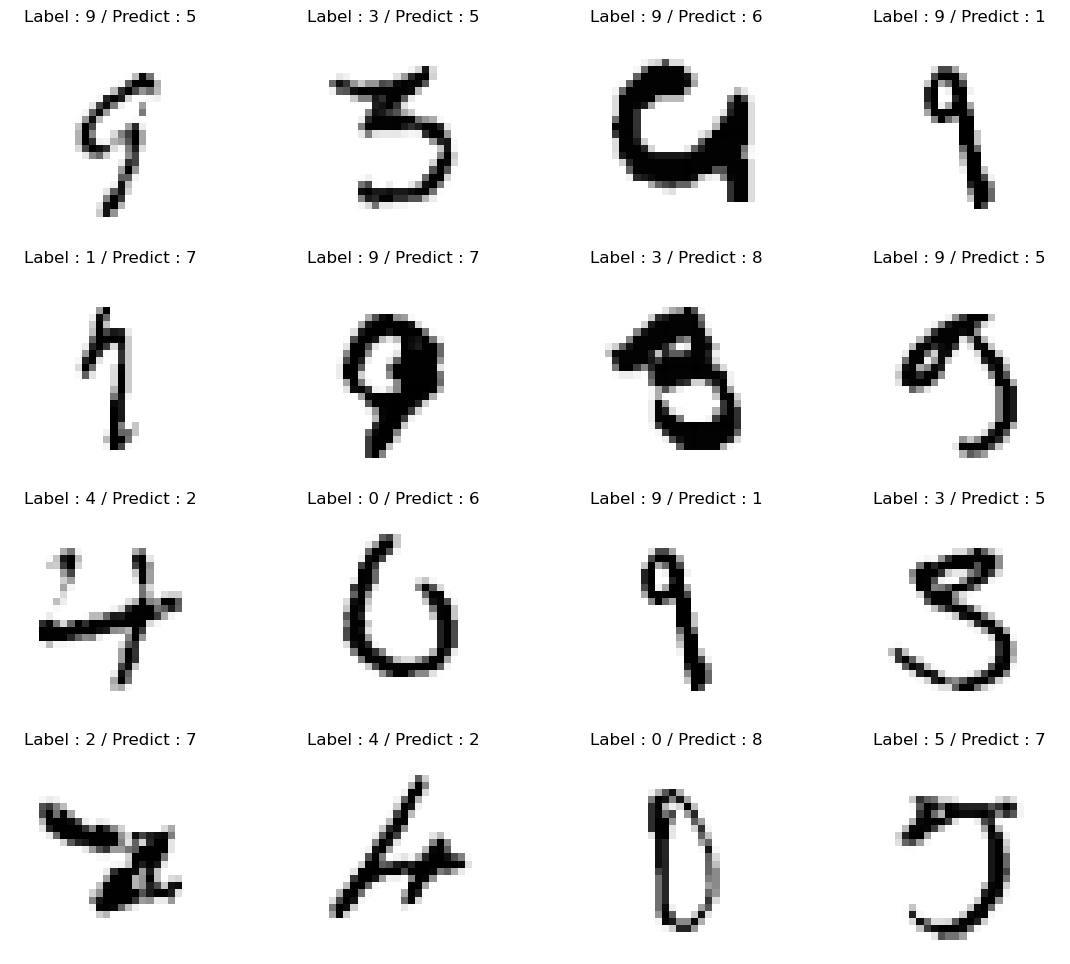

In [16]:
plt.figure(figsize=(14,12))

for i, n in enumerate(samples):
    plt.subplot(4,4, i+1)
    plt.imshow(x_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + ' / Predict : ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

<br></br>

# MNIST fashion

- MNIST fashion data는 숫자로 된 MNIST 데이터처럼 28*28 크기의 패션과 관련된 10개 종류의 데이터이다.

	• 0 : 티셔츠 </br>
	• 1 : 바지 </br>
	• 2 : 스웨터 </br>
	• 3 : 드레스 </br>
	• 4 : 코트 </br>
	• 5 : 샌들 </br>
	• 6 : 셔츠 </br>
	• 7 : 운동화 </br>
	• 8 : 가방 </br>
	• 9 : 부츠 </br>

	<img src="https://github.com/ElaYJ/supplement/assets/153154981/58456c23-f40c-467a-aa23-0699c81608d0" width="57%"><br></br>


#### - 데이터 읽기

In [17]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255, x_test/255

4422102/4422102 [==============================] - 0s 0us/step


#### - 데이터 확인

- 어떻게 생겼는지 확인해본다.

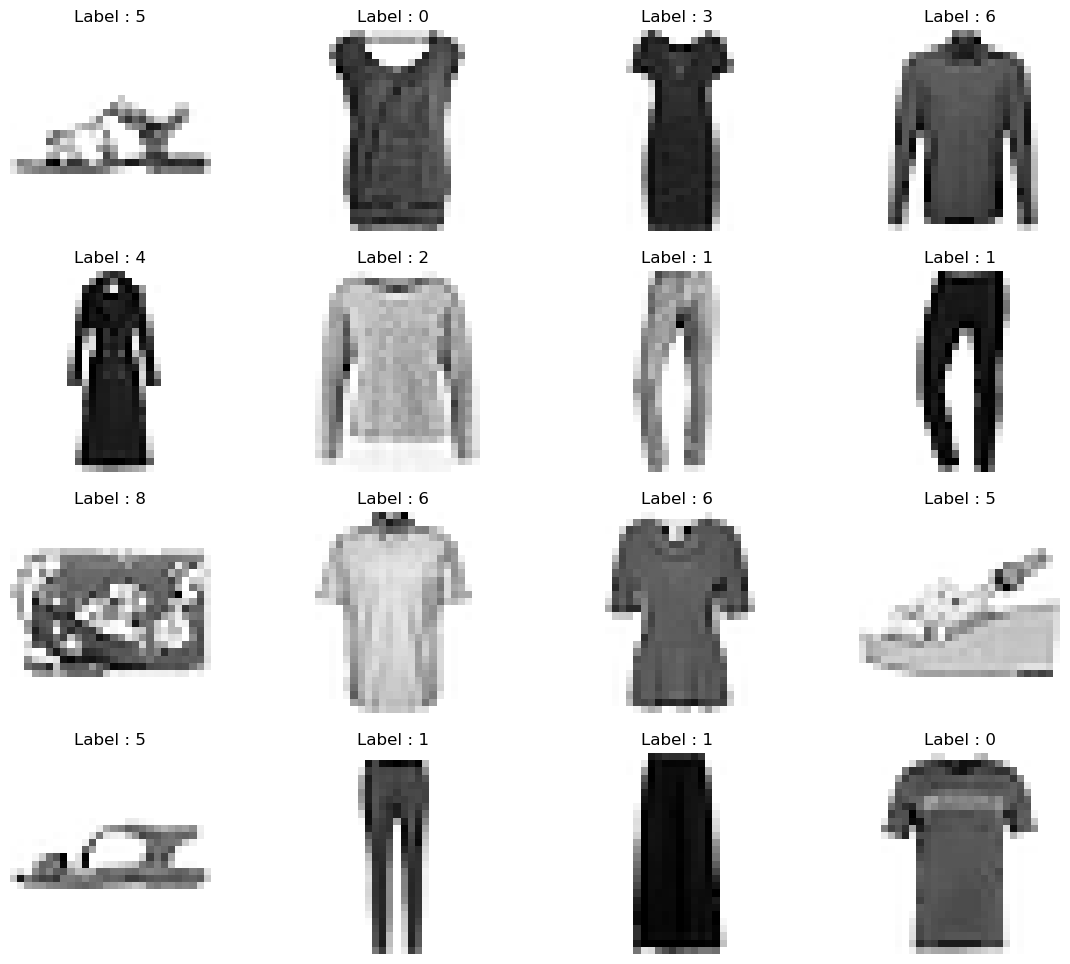

In [18]:
samples = random.choices(population=range(0, len(y_train)), k=16)

plt.figure(figsize=(14,12))

for i, n in enumerate(samples):
    plt.subplot(4,4, i+1)
    plt.imshow(x_train[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_train[n]))
    plt.axis('off')

plt.show()

#### - 모델 만들기

- 모델은 필기체 숫자 데이터일 때와 동일한 구조로 한다.

In [19]:
model = tf.keras.models.Sequential([
	tf.keras.layers.Flatten(input_shape=(28,28)),
	tf.keras.layers.Dense(1000, activation='relu'),
	tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 1000)              785000    
                                                                 
 dense_3 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795010 (3.03 MB)
Trainable params: 795010 (3.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### - 모델 학습

In [21]:
%%time

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=100, verbose=1)

Epoch 1/10
600/600 [==============================] - 11s 17ms/step - loss: 0.4810 - accuracy: 0.8306 - val_loss: 0.4085 - val_accuracy: 0.8517
Epoch 2/10
600/600 [==============================] - 12s 20ms/step - loss: 0.3625 - accuracy: 0.8684 - val_loss: 0.4052 - val_accuracy: 0.8548
Epoch 3/10
600/600 [==============================] - 12s 19ms/step - loss: 0.3227 - accuracy: 0.8821 - val_loss: 0.3439 - val_accuracy: 0.8769
Epoch 4/10
600/600 [==============================] - 9s 15ms/step - loss: 0.2983 - accuracy: 0.8898 - val_loss: 0.3609 - val_accuracy: 0.8697
Epoch 5/10
600/600 [==============================] - 10s 16ms/step - loss: 0.2793 - accuracy: 0.8966 - val_loss: 0.3564 - val_accuracy: 0.8740
Epoch 6/10
600/600 [==============================] - 11s 18ms/step - loss: 0.2639 - accuracy: 0.9019 - val_loss: 0.3346 - val_accuracy: 0.8828
Epoch 7/10
600/600 [==============================] - 9s 15ms/step - loss: 0.2522 - accuracy: 0.9056 - val_loss: 0.3296 - val_accuracy: 0

#### - 결과 확인

- 학습 상황을 관찰해본다.

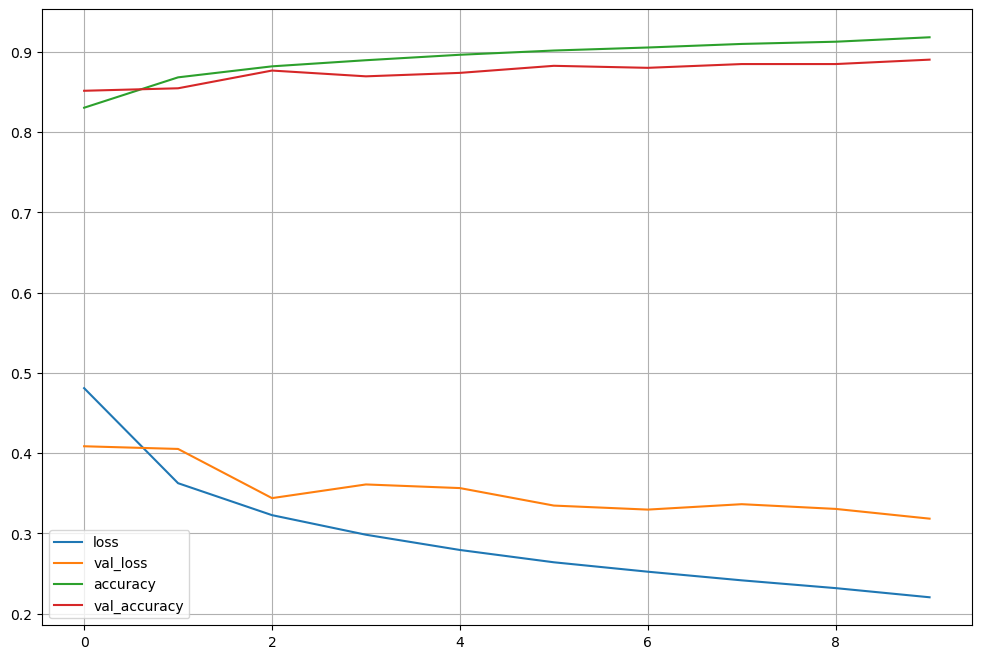

In [22]:
import matplotlib.pyplot as plt

plot_target = ['loss','val_loss','accuracy','val_accuracy'] #--> validation: test data

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show() #--> val_loss와 train loss사이에 간격이 발생한다.

In [23]:
score = model.evaluate(x_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3183 - accuracy: 0.8905
Test loss : 0.3183075785636902
Test accuracy : 0.890500009059906


In [24]:
# 무엇이 틀렸는지 확인해본다.

import numpy as np

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 1s 3ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [25]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [26]:
# 틀린 데이터의 인덱스만 모은다.

wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

1095

In [27]:
# 그 중 16개만 랜덤 샘플링

import random

samples = random.choices(population=wrong_result, k=16)
print(samples)

[1846, 5228, 1533, 5266, 3051, 2506, 1284, 9344, 3658, 7182, 1572, 5161, 7118, 926, 8074, 9835]


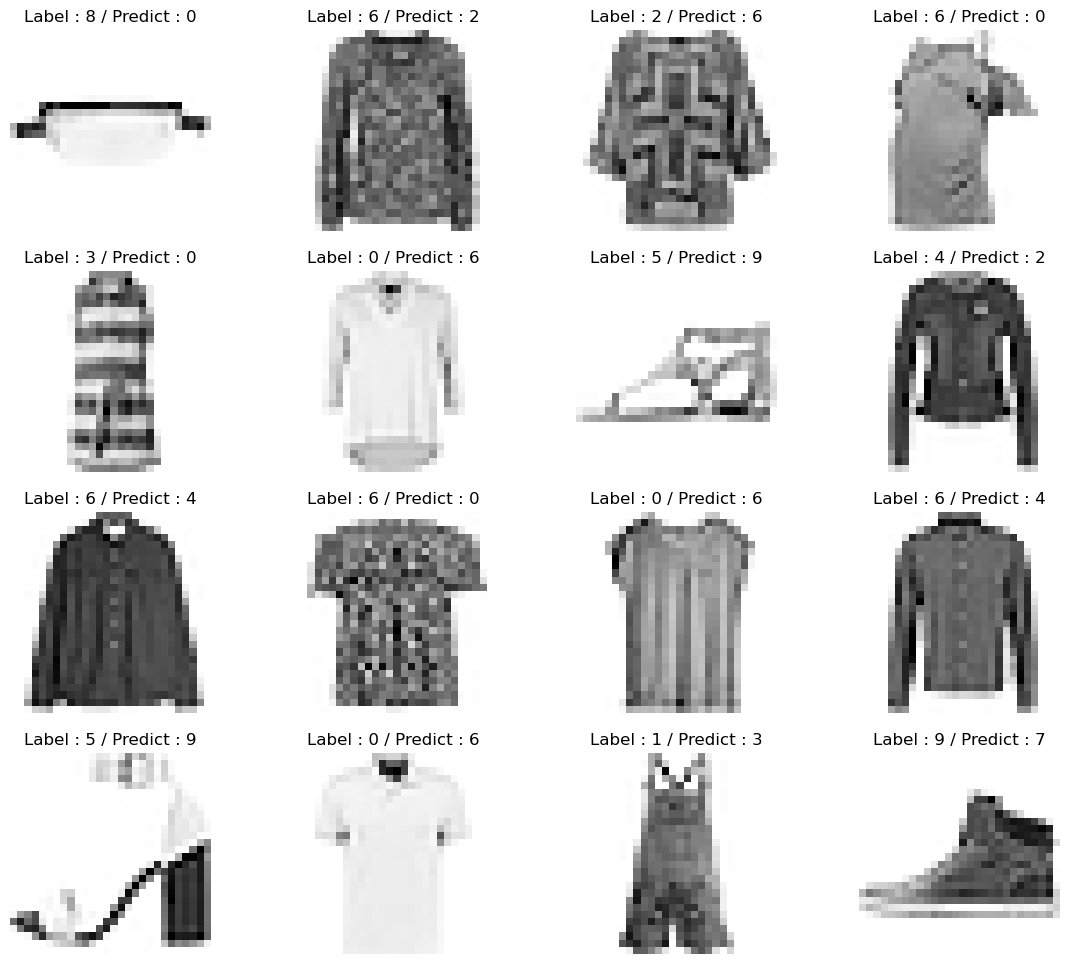

In [28]:
plt.figure(figsize=(14,12))

for i, n in enumerate(samples):
    plt.subplot(4,4, i+1)
    plt.imshow(x_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + ' / Predict : ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()